In [1]:
#https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python
#https://nlpforhackers.io/topic-modeling/

In [2]:
#import modules
import os.path
from gensim import corpora
from gensim.models import LsiModel
from gensim.models import LdaModel
from gensim.models import LdaMulticore
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import pandas as pd


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\raghuram\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
documents_list = []
titles=[]
with open('C://Users//raghuram//Desktop//clustering//sample.txt' ,"r",encoding="utf8") as fin:
    for line in fin.readlines():
        text = line.strip()
        documents_list.append(text)
        titles.append( text[0:min(len(text),4)] )
print("Total Number of Documents:",len(documents_list))




Total Number of Documents: 29


In [4]:
def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer 
    tokenizer = RegexpTokenizer(r'[a-zA-Z]\w+') #(No Numbers)
    # create English stop words list
    
    en_stop=stopwords.words('english')
    en_stop.extend(['from', 'subject', 're', 'edu', 'use','raghu'])
    
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
         # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
              
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        
        # remove less than 3 size letter
        stemmed_tokens=[i for i in stemmed_tokens if len(i)>3 ]
        
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts

In [5]:
doc_clean=preprocess_data(documents_list)


In [6]:
'''
#Exclude common words across documents

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=8)
vectorizer.fit(documents_list)
print(len(vectorizer.get_feature_names()))
print(vectorizer.get_feature_names())

exclude_very_common_words=vectorizer.get_feature_names()
'''

'\n#Exclude common words across documents\n\nfrom sklearn.feature_extraction.text import CountVectorizer\nvectorizer = CountVectorizer(min_df=8)\nvectorizer.fit(documents_list)\nprint(len(vectorizer.get_feature_names()))\nprint(vectorizer.get_feature_names())\n\nexclude_very_common_words=vectorizer.get_feature_names()\n'

In [16]:
#prepare_corpus
# Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
len(dictionary)


2973

In [8]:
#To FIND THE BEST no_of_topics score
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=num_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [9]:
#generate coherence scores across models to determine OPTIMUM number_of_topics.
model_list, coherence_values=compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop=25, start=2, step=2)
print('List of models',model_list)
print('coherence values',coherence_values)

List of models [<gensim.models.lsimodel.LsiModel object at 0x000002EBE199C940>, <gensim.models.lsimodel.LsiModel object at 0x000002EBE1A346D8>, <gensim.models.lsimodel.LsiModel object at 0x000002EBDAD8B0F0>, <gensim.models.lsimodel.LsiModel object at 0x000002EBE1A2E208>, <gensim.models.lsimodel.LsiModel object at 0x000002EBE1A2B7F0>, <gensim.models.lsimodel.LsiModel object at 0x000002EBE1A22C18>, <gensim.models.lsimodel.LsiModel object at 0x000002EBE1A51CF8>, <gensim.models.lsimodel.LsiModel object at 0x000002EBE1A51C50>, <gensim.models.lsimodel.LsiModel object at 0x000002EBE1A24668>, <gensim.models.lsimodel.LsiModel object at 0x000002EBE1A4EA20>, <gensim.models.lsimodel.LsiModel object at 0x000002EBDE0E1748>, <gensim.models.lsimodel.LsiModel object at 0x000002EBE19A1EB8>]
coherence values [0.7273714046900475, 0.44118499561973823, 0.4536528635999118, 0.43852088728962263, 0.4308803450322767, 0.4895805952376427, 0.4784099018380486, 0.45975584723845153, 0.45182390049927407, 0.447199064426

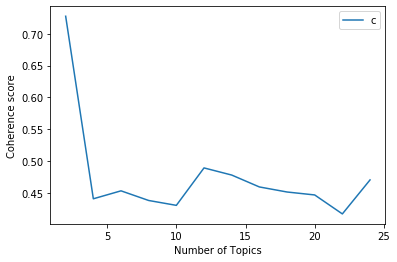

In [10]:
#Plot graph
start=2
stop=25
step=2
x = range(start, stop, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [31]:
#From above figure we get to know 6 topics is best optimum
#So train the LSA & LDA for 7 topics

number_of_topics=8;words=3
#LSA
lsamodel= LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary) 
print("LSA listed Topics") 
print("=====================")
for i,model in enumerate(lsamodel.print_topics(num_topics=number_of_topics, num_words=words)):
    print("Topic",i,"==>",model)

#LDA
lda_model = LdaModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)
print("\nLDA listed Topics") 
print("=====================")
for i,model in enumerate(lda_model.print_topics(num_topics=number_of_topics, num_words=words)): 
    print("Topic",i,"==>",model)

#LDA (with chunksize & passes(like epochs))    
epoch_lda_model = LdaMulticore(corpus=doc_term_matrix,
                                       id2word=dictionary,
                                       num_topics=number_of_topics, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)   
print("\nCHUNKSIZE LDA listed Topics") 
print("=====================")
for i,model in enumerate(epoch_lda_model.print_topics(num_topics=number_of_topics, num_words=words)): 
    print("Topic",i,"==>",model)

LSA listed Topics
Topic 0 ==> (0, '0.222*"cameron" + 0.200*"prime" + 0.195*"minist"')
Topic 1 ==> (1, '-0.405*"ticket" + -0.310*"price" + 0.253*"cameron"')
Topic 2 ==> (2, '-0.361*"ticket" + 0.293*"trump" + 0.267*"scientist"')
Topic 3 ==> (3, '0.374*"scientist" + -0.258*"bank" + 0.216*"climat"')
Topic 4 ==> (4, '-0.383*"poll" + 0.288*"scientist" + -0.214*"percentag"')
Topic 5 ==> (5, '0.379*"educ" + 0.211*"univers" + 0.206*"school"')
Topic 6 ==> (6, '0.331*"educ" + -0.331*"said" + -0.279*"trump"')
Topic 7 ==> (7, '0.195*"sport" + -0.183*"brexit" + 0.152*"banker"')

LDA listed Topics
Topic 0 ==> (0, '0.007*"ticket" + 0.006*"educ" + 0.006*"said"')
Topic 1 ==> (1, '0.009*"said" + 0.008*"trump" + 0.005*"year"')
Topic 2 ==> (2, '0.005*"year" + 0.004*"price" + 0.004*"said"')
Topic 3 ==> (3, '0.006*"scientist" + 0.006*"year" + 0.006*"said"')
Topic 4 ==> (4, '0.006*"said" + 0.006*"bank" + 0.005*"year"')
Topic 5 ==> (5, '0.006*"bank" + 0.006*"trump" + 0.006*"said"')
Topic 6 ==> (6, '0.006*"said

# Lets now put the models to work and transform unseen documents to their topic distribution

In [148]:
#If there is negative score given for the word...then that means that word was not present during the training
text ="The economy is working better than ever"
doc_list=[]
for word in text.split():
    doc_list.append(word)
#bow=dictionary.doc2bow(clean_text(doc_list)
bow=dictionary.doc2bow(doc_list)

print("LSA listed Topics")
print("=================")
print(lsamodel[bow])

print("\nLDA listed Topics")
print("=================")
print(lda_model[bow])

print("\nLDA-Chunksize listed Topics")
print("=================")
print(epoch_lda_model[bow])

LSA listed Topics
[]

LDA listed Topics
[(0, 0.125), (1, 0.125), (2, 0.125), (3, 0.125), (4, 0.125), (5, 0.125), (6, 0.125), (7, 0.125)]

LDA-Chunksize listed Topics
([(0, 0.125), (1, 0.125), (2, 0.125), (3, 0.125), (4, 0.125), (5, 0.125), (6, 0.125), (7, 0.125)], [], [])


In [149]:
#Gensim offers a simple way of performing similarity queries using topic models.
from gensim import similarities

#feed the entire corpus(i.e document matrix) to MatrixSimilarity ==> To find the similar documents through LDA.
lda_index = similarities.MatrixSimilarity(lda_model[doc_term_matrix])
 
# Let's perform some queries (For given new word find its similarity score)
similarities = lda_index[lda_model[bow]]
# Sort the similarities
similarities = sorted(enumerate(similarities), key=lambda item: -item[1])
 
# Top most similar documents for the Document : "The economy is working better than ever"
print(similarities[:10])
# [(10, 0.9880539), (22, 0.9245134), (26, 0.3938291), (0, 0.26569474), (28, 0.12166141), (23, 0.08445983), (19, 0.08060737), (27, 0.07882397), (1, 0.07557659), (24, 0.06911537)]

# Let's see what's the most similar document
document_id, similarity = similarities[0]
print('\nThe most similar document for the given BOW is Document Number:',document_id)
print('\n','TEXT:\n',documents_list[document_id][:1000])

[(26, 0.5852072), (24, 0.54271686), (12, 0.49743098), (17, 0.48555863), (7, 0.4847793), (9, 0.48100603), (10, 0.42792708), (19, 0.42579332), (18, 0.41802928), (4, 0.36678)]

The most similar document for the given BOW is Document Number: 26

 TEXT:
 Trump campaign manager sued to get on Massachusetts ballot as 21-year-old Donald Trump this week threatened to sue the Republican party over disputed results in a bitterly contested presidential primary that may yet end up in the courts if the party establishment denies him the nomination this summer. The has found that Trumpâ€™s pugnacious campaign manager, Corey Lewandowski, has more experience in this field than was previously known, having resorted to litigation in his only election as a candidate himself. Profiles of Lewandowski have noted that as a Republican college student, he ran for a seat in the Massachusetts legislature in 1994 but lost to Thomas Golden Jr, the Democratic candidate. Golden still represents their native Lowell in

In [14]:
#To choose things greaater than certain probability
'''
Extracting out final sentence from topic 1
sentence1= final_matrix[final_matrix["abs_topic1"]>=0.4]
sentence1[['abs_topic1']]
'''


'\nExtracting out final sentence from topic 1\nsentence1= final_matrix[final_matrix["abs_topic1"]>=0.4]\nsentence1[[\'abs_topic1\']]\n'